The data provided here was obtained by running Q3.py on three month's worth of the Reddit Comment Dataset. Please see my application to learn more.

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
#Each of these are regular expressions, many of which represent one or more politically-relevant words or phrases.

political_words = [r'republicans?',
                   r'conservatives?',
                   r'trump',
                   r'make america great again|maga\b',

                   r'democrats?',
                   r'liberals?',
                   r'hillary|clinton|hillary clinton',
                   r'emails?',
                   r'barack|obama|barack obama',
                   r'bernie|sanders|bernie sanders',

                   r'america',
                   r'americans?',

                   r'abortion',
                   r'marijuana',
                   r'legalization',

                   r'immigration',
                   r'foreigners?',
                   r'mexic(o|ans?)',
                   r'(border )?wall',

                   r'gun control',
                   r'guns',
                   r'shooting',

                   r'gay marriage',
                   r'homosexual relations',

                   r'jobs?',
                   r'economy',
                   r'wall street',
                   r'recession',

                   r'(universal )?health (care|insurance)',

                   r'global warming',
                   r'climate change',

                   r'russia',
                   r'hacking',
                   r'spying',

                   r'islam(ic)?',
                   r'radicalis(m|ts?)',
                   r'terroris(m|ts?)',

                   r'racis(m|ts?)',
                   r'black lives matter',

                   r'white supremacists?',
                   r'neo-nazis?',
                   r'(neo[- ]?)?nazis?',
                   r'white lives matter',
                   r'confederacy',
                   ]

In [3]:
# Each of these subreddits are politically skewed, with the exception of the final four.
# Each of these four is merely a very popular subreddit from which general political trends could be ascerned.

political_subreddits = ['politics',
                        'Ask_Politics',
                        'POLITIC',
                        'SandersForPresident',
                        'hillaryclinton',
                        'The_Donald',
                        'TedCruzForPresident',
                        'democrats',
                        'Republican',
                        'PoliticalHumor',
                        'PoliticalDiscussion',

                        'worldnews',
                        'news',
                        'funny',
                        'AskReddit',
                        ]

In [21]:
results2014 = [
    [0.040879674017257908, 0.018951741770533718, 0.0011705017577500799, 0.0, 0.026558005752636626, 0.016678651326302332, 0.0055209332054969636, 0.0025966762543943754, 0.036732981783317353, 0.0017138063279002877, 0.042397730904442314, 0.029002876318312561, 0.011728986896772133, 0.0098873441994247364, 0.004330457015020773, 0.0013302972195589646, 0.00042345797379354425, 0.0022091722595078299, 0.0056008309364014063, 0.0016818472355385108, 0.0077341003515500164, 0.0025447427293064876, 0.0025607222754873761, 1.9974432726110579e-05, 0.044758708852668583, 0.014609300095877277, 0.0023809523809523812, 0.0018136784915308405, 0.0086689038031319918, 0.0027964205816554811, 0.0034316075423457973, 0.0026166506871204858, 0.00069910514541387029, 0.0039349632470437844, 0.00076701821668264617, 1.5979546180888464e-05, 0.0061081815276446145, 0.0055369127516778525, 0.0, 8.788750399488655e-05, 5.1933525087887503e-05, 0.0015460210930009588, 0.0, 0.00015180568871844041],
    [0.031466113416320884, 0.030428769017980636, 0.00069156293222683268, 0.0, 0.049446749654218532, 0.038035961272475792, 0.0082987551867219917, 0.0031120331950207467, 0.033886583679114797, 0.0, 0.074343015214384509, 0.058782849239280774, 0.007261410788381743, 0.0058782849239280774, 0.0062240663900414933, 0.0065698478561549102, 0.0017289073305670815, 0.0058782849239280774, 0.007261410788381743, 0.0058782849239280774, 0.010027662517289074, 0.0020746887966804979, 0.0065698478561549102, 0.0, 0.049100968188105117, 0.028008298755186723, 0.0041493775933609959, 0.0024204702627939143, 0.0076071922544951589, 0.0024204702627939143, 0.0079529737206085749, 0.022821576763485476, 0.0, 0.0017289073305670815, 0.0055325034578146614, 0.0, 0.0069156293222683261, 0.0031120331950207467, 0.0, 0.0, 0.0, 0.0031120331950207467, 0.0, 0.0],
    [0.010951020577153976, 0.033039373990808592, 0.00026911770794518281, 0.0, 0.0097710429346250984, 0.0077216080818117835, 0.0027118784416014573, 0.001945928042065168, 0.038794352668405578, 0.001304185815426655, 0.020846271684676853, 0.012006790046785079, 0.0027532811659007161, 0.008073531238355483, 0.0013662899018755433, 0.0017389144205688734, 0.00022771498364592389, 0.004305883327122925, 0.0031466070467436758, 4.140272429925889e-05, 0.0026911770794518278, 0.0041195710677762593, 0.00010350681074814723, 0.0, 0.0082391421355525185, 0.010661201507059164, 6.2104086448888331e-05, 0.00022771498364592389, 0.00026911770794518281, 0.00014490953504740612, 6.2104086448888331e-05, 0.0073282822009688234, 0.00049683269159110665, 0.003250113857491823, 0.0021322403014118331, 0.0, 0.0025876702687036806, 0.0023806566472073863, 0.0, 0.0, 2.0701362149629445e-05, 0.0015526021612222085, 0.0, 0.0],
    [0.034482758620689655, 0.0, 0.0, 0.0, 0.1206896551724138, 0.051724137931034482, 0.017241379310344827, 0.0, 0.068965517241379309, 0.31034482758620691, 0.086206896551724144, 0.051724137931034482, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034482758620689655, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1206896551724138, 0.034482758620689655, 0.0, 0.0, 0.034482758620689655, 0.0, 0.0, 0.0, 0.0, 0.034482758620689655, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.11175115207373272, 0.020737327188940093, 0.001152073732718894, 0.0, 0.078341013824884786, 0.018433179723502304, 0.038018433179723504, 0.004608294930875576, 0.080645161290322578, 0.0034562211981566822, 0.04377880184331797, 0.032258064516129031, 0.0057603686635944703, 0.001152073732718894, 0.0, 0.0, 0.002304147465437788, 0.0, 0.011520737327188941, 0.0, 0.014976958525345621, 0.0034562211981566822, 0.0034562211981566822, 0.0, 0.038018433179723504, 0.0080645161290322578, 0.0069124423963133645, 0.0, 0.010368663594470046, 0.004608294930875576, 0.002304147465437788, 0.0034562211981566822, 0.001152073732718894, 0.0034562211981566822, 0.002304147465437788, 0.0, 0.0092165898617511521, 0.0092165898617511521, 0.0, 0.0, 0.0, 0.0080645161290322578, 0.0, 0.0],
    [0.089197669206633801, 0.037651277454056477, 0.0067234424025100848, 0.0, 0.052442850739578661, 0.034513670999551771, 0.013895114298520844, 0.0035858359480053789, 0.074854325414612288, 0.0, 0.053787539220080678, 0.039892424921559838, 0.0098610488570147915, 0.0080681308830121024, 0.0040340654415060512, 0.014343343792021516, 0.0, 0.0031376064545047063, 0.0058269834155087403, 0.0040340654415060512, 0.005378753922008068, 0.001344688480502017, 0.0098610488570147915, 0.0, 0.051546391752577317, 0.015688032272523533, 0.00044822949350067237, 0.0017929179740026895, 0.028238458090542359, 0.001344688480502017, 0.001344688480502017, 0.0022411474675033617, 0.0, 0.002689376961004034, 0.0017929179740026895, 0.0, 0.005378753922008068, 0.0071716718960107579, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.031892572387746537, 0.017624842635333614, 0.0, 0.0, 0.020142677297524128, 0.018883759966428871, 0.0075535039865715489, 0.00083927822073017204, 0.048678136802349982, 0.00041963911036508602, 0.041124632815778432, 0.029374737725556023, 0.0067142257658413763, 0.01049097775912715, 0.001258917331095258, 0.0, 0.0, 0.0016785564414603441, 0.0071338648762064626, 0.0016785564414603441, 0.005035669324381032, 0.005035669324381032, 0.0016785564414603441, 0.0, 0.026017624842635333, 0.01049097775912715, 0.0020981955518254302, 0.002517834662190516, 0.002517834662190516, 0.00083927822073017204, 0.00041963911036508602, 0.0096516995383969777, 0.00041963911036508602, 0.0041963911036508603, 0.0020981955518254302, 0.0, 0.0067142257658413763, 0.0067142257658413763, 0.0, 0.0, 0.0, 0.0016785564414603441, 0.0, 0.0],
    [0.032284870121876155, 0.030869137018342978, 0.0011695186507447988, 0.0, 0.03299273667364274, 0.026560384094546349, 0.0095408100455496737, 0.0025852517542779762, 0.035424104394927984, 0.0015080635233288193, 0.057860396405268986, 0.042471993105995323, 0.015449956912470761, 0.0068324510648775085, 0.0031700110796503756, 0.0044626369567893637, 0.00092330419795642004, 0.0035085559522343959, 0.0062784685461036559, 0.0056013788009356153, 0.012803151544995691, 0.0038163240182198695, 0.0048627354425704785, 0.0, 0.051212606179982766, 0.02840699249045919, 0.0014157331035331774, 0.0036316631786285857, 0.011602856087652345, 0.0020004924289055768, 0.002400590914686692, 0.0077249784562353806, 0.00018466083959128401, 0.003600886372030038, 0.0018773852025113875, 3.0776806598547338e-05, 0.0095408100455496737, 0.0076326480364397389, 0.0, 0.0002462144527883787, 0.00015388403299273668, 0.0023698141080881448, 0.0, 0.00027699125938692603],
    [0.0018283279543394966, 0.0041722216796542299, 0.000645025017431574, 4.5424297002223517e-06, 0.0045515145596227964, 0.0045129039071709065, 0.00068590688473357515, 0.0016239186178294907, 0.0064479789594656285, 7.7221304903779984e-05, 0.039044454488261229, 0.025869137142766296, 0.002673219878580854, 0.001290050034863148, 0.00044515811062179051, 0.0022257905531089524, 0.0014240517110197073, 0.0043698173716139026, 0.0048967392168396953, 0.00034522465721689873, 0.0045197175517212402, 0.0026686774488806318, 0.00078356912328835567, 8.857737915433586e-05, 0.016098370857588015, 0.0066046927841232998, 0.00068136445503335274, 0.00042471717697078993, 0.0012173711596595903, 0.0013604576952165944, 0.0014058819922188178, 0.02039323813914825, 0.00046332782942267987, 0.0052987442453093737, 0.010327213923455517, 8.176373460400234e-05, 0.012203237389647348, 0.0074177877004631011, 0.0, 0.00013627289100667057, 0.00067682202533313044, 0.0061072967319489519, 0.0, 2.0440933651000585e-05],
    [0.0051727978795304457, 0.0041420140684999265, 0.0006418800288468437, 7.5515297511393374e-06, 0.0043043719581494222, 0.0044931602019279053, 0.00084954709700317543, 0.0021521859790747111, 0.0093941030104173345, 0.00023787318716088913, 0.023689148829324099, 0.015174799034914498, 0.0024278168149912968, 0.011980501950182559, 0.0043459053717806884, 0.00051727978795304455, 0.00040778260656152419, 0.0030470422545847225, 0.0039494500598458732, 0.003122557552096116, 0.017712113031297314, 0.0087069138030636557, 0.0015291847746057158, 2.6430354128987679e-05, 0.019792559477736203, 0.0034019641528882714, 0.0006305527342201346, 0.00043043719581494221, 0.003179194025229661, 0.00072494685610937639, 0.00066453461810026166, 0.0028884601298107965, 0.00035114613342797916, 0.0016802153696285026, 0.0011365052275464703, 3.7757648755696687e-06, 0.004693275740333098, 0.0048103244514757573, 0.0, 7.9291062386963038e-05, 6.418800288468437e-05, 0.0011553840519243185, 0.0, 1.8878824377848342e-05],
    [0.00022179158896712962, 0.00038704806702106933, 0.00018178212585933369, 9.5674803083859832e-06, 0.00019743800272760165, 0.00050968576915583512, 0.00015134014305992374, 0.00082628239026969863, 0.0010106738289404101, 7.740961340421386e-05, 0.0092995908597511764, 0.0060701313702023439, 0.00017308441648807371, 0.00091151994210804637, 0.00012785632775752178, 7.1321216844331882e-05, 0.0001696053327395697, 0.0010132831417517883, 0.0033416599404380862, 7.3060758718583872e-05, 0.0012837819031979738, 0.00071669125219182275, 0.00011220045088925381, 1.130702218263798e-05, 0.0078801246903615462, 0.00043662501043725127, 0.00015829831055693173, 7.3060758718583872e-05, 0.00032790364329650146, 0.00033138272704500544, 0.00020787525397311364, 0.0014812199059255754, 9.8284115895237834e-05, 7.6539842467087866e-05, 0.00032616410142224944, 4.3488546856299924e-06, 0.0004514111163683932, 0.0031659662111386344, 0.0, 1.3916334994015976e-05, 2.3483815302401958e-05, 0.00084541735088647049, 0.0, 8.6977093712599849e-06],
    [0.00051797345107154472, 0.00073085484744600385, 0.00025386391118451532, 1.7076047837523453e-05, 0.00041802165106257416, 0.00080507873537977246, 0.0001953499872612683, 0.0011582114046597574, 0.0011338495764115573, 8.902312939295561e-05, 0.011760615666659154, 0.0081516498763580299, 0.001254292633825556, 0.0011176842511253684, 0.00021789037040679927, 0.00016529614306722704, 0.00027139532029770607, 0.0015666704689333184, 0.0048862541685478775, 0.00013387621504618388, 0.0017308282088113773, 0.0011420460793735686, 0.00035176658545298318, 1.4571560821353348e-05, 0.014470698298793043, 0.0007877750069044153, 0.00020240808703411134, 8.492487791194998e-05, 0.00051023230938520084, 0.00019762679363960478, 0.00015618891755388118, 0.0016044654548137036, 0.00017326496539140463, 0.00015709964010521578, 0.00028300703282722206, 2.5044870161701065e-06, 0.0005867330036973059, 0.0021841403587381666, 0.0, 2.4817189523867421e-05, 3.2786011848045034e-05, 0.00085858368527067929, 0.0, 3.8478027793886184e-05]
]

results2015 = [
    [0.049741351504734063, 0.022435256219200006, 0.0015759797817308831, 0.0, 0.03623936928145937, 0.022557741694464065, 0.035512622128225958, 0.0028865743670563066, 0.033842736815459303, 0.051476562404308222, 0.049680108767102035, 0.034018299330004449, 0.010313277017233707, 0.0022863955382624208, 0.00084514977932200201, 0.0024619580528075715, 0.00053485324198638781, 0.0026048577739489725, 0.0072143944930530323, 0.0015882283292572889, 0.0061161080648519765, 0.0020536731352607104, 0.0038460439232914298, 3.2662793403748875e-05, 0.03691712224458716, 0.015486246922552434, 0.0032132023010937954, 0.001816867883083531, 0.0055485920294618398, 0.0023353897283680445, 0.0056955745997787095, 0.0025109522429131947, 9.3905531035778003e-05, 0.0018250335814344683, 0.0020700045319625849, 3.2662793403748875e-05, 0.0046299509649814028, 0.0064590673955913398, 4.4911340930154697e-05, 8.5739832684840784e-05, 7.7574134333903565e-05, 0.0015963940276082261, 0.0, 9.7988380211246612e-05],
    [0.051004636785162288, 0.030911901081916538, 0.0015455950540958269, 0.0, 0.078052550231839254, 0.031298299845440497, 0.039799072642967545, 0.0046367851622874804, 0.052936630602782073, 0.053709428129829984, 0.070324574961360117, 0.059119010819165381, 0.0054095826893353939, 0.0088871715610510053, 0.00077279752704791343, 0.0034775888717156105, 0.0019319938176197836, 0.0034775888717156105, 0.0081143740340030909, 0.0054095826893353939, 0.0085007727975270481, 0.00077279752704791343, 0.0065687789799072646, 0.0, 0.02009273570324575, 0.019706336939721791, 0.0023183925811437402, 0.0030911901081916537, 0.0046367851622874804, 0.0023183925811437402, 0.0038639876352395673, 0.015069551777434312, 0.0, 0.00077279752704791343, 0.0034775888717156105, 0.00038639876352395672, 0.0065687789799072646, 0.0073415765069551773, 0.00038639876352395672, 0.0, 0.00077279752704791343, 0.002704791344667697, 0.0, 0.0],
    [0.033825631252977606, 0.079323487374940452, 0.0014292520247737017, 0.0, 0.023820867079561697, 0.028346831824678419, 0.030252501191043352, 0.0038113387327298712, 0.037160552644116246, 0.050500238208670799, 0.04954740352548833, 0.03263458789899952, 0.004287756074321105, 0.0021438780371605525, 0.0004764173415912339, 0.0021438780371605525, 0.0009528346831824678, 0.0030967127203430206, 0.0095283468318246786, 0.0011910433539780848, 0.0028585040495474035, 0.0028585040495474035, 0.00023820867079561695, 0.0, 0.016198189614101955, 0.0095283468318246786, 0.00071462601238685087, 0.00071462601238685087, 0.0009528346831824678, 0.0004764173415912339, 0.0026202953787517864, 0.010481181515007145, 0.0004764173415912339, 0.0045259647451167222, 0.0047641734159123393, 0.0, 0.007146260123868509, 0.014054311576941401, 0.00023820867079561695, 0.0, 0.0, 0.0033349213911386373, 0.0, 0.0],
    [0.037300046686487946, 0.015406541022679805, 0.00086001425166474187, 0.0, 0.056859227952920366, 0.018084871120721428, 0.070742315158365487, 0.0061921026119861411, 0.026218148757893703, 0.24313831486350346, 0.046023048381944612, 0.03196795832616655, 0.00213774971128093, 0.0032680541563260192, 0.0020394623682335306, 0.0029240484556601223, 0.00071258323709364325, 0.0013023072953780377, 0.0083789959947907708, 0.0059955279258913433, 0.0081332776371722728, 0.0012777354596161879, 0.0021623215470427796, 0.0, 0.031107944074501806, 0.011941912180258987, 0.0048652234808462544, 0.0010320171019976903, 0.0072486915497456811, 0.00058972405828439448, 0.0037349190358011647, 0.0013514509669017372, 9.828734304739907e-05, 0.0012777354596161879, 0.00073715507285549299, 2.4571835761849768e-05, 0.0012777354596161879, 0.0033663414993734182, 0.00012285917880924883, 0.00017200285033294838, 9.828734304739907e-05, 0.0010320171019976903, 0.0, 9.828734304739907e-05],
    [0.0, 0.014285714285714285, 0.0, 0.0, 0.071428571428571425, 0.028571428571428571, 0.21428571428571427, 0.0, 0.014285714285714285, 0.028571428571428571, 0.014285714285714285, 0.0, 0.0, 0.0, 0.0, 0.014285714285714285, 0.0, 0.0, 0.014285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014285714285714285, 0.014285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.10160055671537926, 0.032011134307585246, 0.00069589422407794019, 0.0, 0.13013221990257481, 0.043145441892832287, 0.087682672233820466, 0.0027835768963117608, 0.048712595685455808, 0.10020876826722339, 0.050104384133611693, 0.038274182324286705, 0.013917884481558803, 0.0013917884481558804, 0.0, 0.0020876826722338203, 0.0, 0.0013917884481558804, 0.013221990257480862, 0.0013917884481558804, 0.0020876826722338203, 0.00069589422407794019, 0.0069589422407794017, 0.0, 0.037578288100208766, 0.012526096033402923, 0.0076548364648573418, 0.00069589422407794019, 0.012526096033402923, 0.0034794711203897009, 0.0055671537926235215, 0.0020876826722338203, 0.0, 0.0048712595685455815, 0.0020876826722338203, 0.00069589422407794019, 0.0055671537926235215, 0.0055671537926235215, 0.0, 0.0, 0.0, 0.0034794711203897009, 0.0, 0.00069589422407794019],
    [0.1023778071334214, 0.058784676354029064, 0.001321003963011889, 0.0, 0.073315719947159838, 0.053500660501981503, 0.050198150594451783, 0.0019815059445178335, 0.056142668428005284, 0.021796565389696168, 0.058784676354029064, 0.038309114927344783, 0.0099075297225891673, 0.0026420079260237781, 0.00066050198150594452, 0.013870541611624834, 0.0, 0.0079260237780713338, 0.0099075297225891673, 0.0026420079260237781, 0.0026420079260237781, 0.0, 0.010568031704095112, 0.0, 0.018494055482166448, 0.009247027741083224, 0.0039630118890356669, 0.0, 0.009247027741083224, 0.0019815059445178335, 0.0019815059445178335, 0.0, 0.0, 0.0019815059445178335, 0.0026420079260237781, 0.0, 0.004623513870541612, 0.0079260237780713338, 0.0, 0.0, 0.0, 0.0026420079260237781, 0.0, 0.00066050198150594452],
    [0.022674687644608976, 0.020360944007403979, 0.00046274872744099955, 0.0, 0.016196205460434984, 0.019435446552521982, 0.024062933826931976, 0.0023137436372049976, 0.033317908375751965, 0.01018047200370199, 0.046737621471540952, 0.029615918556223971, 0.0027764923646459972, 0.0009254974548819991, 0.00046274872744099955, 0.0, 0.0013882461823229986, 0.0032392410920869968, 0.0064784821841739936, 0.0, 0.006015733456732994, 0.0046274872744099952, 0.0069412309116149932, 0.0, 0.01989819527996298, 0.013419713095788986, 0.0032392410920869968, 0.0018509949097639982, 0.0046274872744099952, 0.00046274872744099955, 0.0013882461823229986, 0.0032392410920869968, 0.0, 0.0, 0.0074039796390559928, 0.0, 0.0041647385469689956, 0.021749190189726979, 0.0, 0.0, 0.0, 0.0046274872744099952, 0.0, 0.0009254974548819991],
    [0.057931963624115866, 0.036712697878073422, 0.0023240148198046479, 0.0, 0.063758841360727514, 0.038464129336476929, 0.035735938026271473, 0.0024924216908049847, 0.04139440889188279, 0.027686089592455373, 0.069686763219939371, 0.05146513977770293, 0.0079824856854159645, 0.0038059952846076122, 0.0017177500842034355, 0.0073762209498147522, 0.00077467160660154937, 0.0037386325362074773, 0.0062984169754125964, 0.0052206130010104415, 0.012866284944425732, 0.0027955540586055913, 0.0067362748400134724, 0.0, 0.049983159312899969, 0.0323004378578646, 0.0021892893230043785, 0.0040754462782081509, 0.0088918827888177839, 0.0014819804648029641, 0.005254294375210509, 0.0071741327046143484, 0.00020208824520040418, 0.0014819804648029641, 0.0033007746716066017, 0.00013472549680026944, 0.0065341865948130686, 0.011586392724823173, 0.00037049511620074101, 0.00020208824520040418, 0.00013472549680026944, 0.0026271471876052545, 0.0, 0.00020208824520040418],
    [0.0031283521700648919, 0.0062974912002349325, 0.0004649702051986932, 1.2236058031544557e-05, 0.0054899113701529917, 0.0045416168727082885, 0.002175978986609674, 0.0008687601202396636, 0.0061057929577407345, 0.0010706550777601488, 0.039169661101979385, 0.025416331874523305, 0.0018925103088788917, 0.00070969136582958432, 0.00034464896788850505, 0.0025614148146033272, 0.0012847860933121785, 0.0031324308560754066, 0.0043641940312508926, 0.0001855802134784258, 0.0030875653099597432, 0.00187007753582106, 0.0013765565285487628, 3.0590145078861397e-05, 0.012219743287502497, 0.0070846776002642985, 0.00040786860105148525, 0.00046293086219343575, 0.00089731092231326755, 0.0011746615710282776, 0.0018578414777895152, 0.02801037617721075, 0.00038543582799365357, 0.001588648201095535, 0.01513396444201536, 8.5652406220811897e-05, 0.013412758945578092, 0.00759859203758917, 8.1573720210297047e-06, 0.00011216386528915844, 0.00033037356685170307, 0.0056836489556524473, 0.0, 4.8944232126178228e-05],
    [0.0061154103599027516, 0.0046599682283183803, 0.00070583471794881153, 3.6477246405623332e-06, 0.0050429793155774257, 0.0051852405765593565, 0.0045541842137420728, 0.0020153678639106892, 0.0067701769328836906, 0.0025552311107139144, 0.030026245378788848, 0.019258162239848838, 0.0021667484364940258, 0.0029656001327771769, 0.00077696534843977694, 0.00086998232677411649, 0.0004577894423905728, 0.0020846746320813733, 0.0036732587130462696, 0.0010779026312861695, 0.009854328116479143, 0.0075690286291668412, 0.0014134932982179042, 2.7357934804217499e-05, 0.025402754396876087, 0.0032318840315382273, 0.00054168710912350646, 0.00033559066693173464, 0.0015265727620753366, 0.0006401756744186895, 0.00092287433406227032, 0.0020153678639106892, 0.00035018156549398397, 0.00085903915285242952, 0.0039851391698143487, 3.4653384085342166e-05, 0.0070765858026909266, 0.011701900646923965, 0.00022433506539458351, 0.00015138057258333684, 0.00010943173921687, 0.001575817044722928, 2.0062485523092832e-05, 8.9369253693777158e-05],
    [0.00043704653070855161, 0.00043704653070855161, 0.0001970731288777825, 2.6812670595616664e-06, 0.00030700507831981082, 0.00058987875310356666, 0.00018232616005019333, 0.0010068157808654059, 0.00097464057615066573, 0.00020109502946712499, 0.0090036947860080759, 0.0060663667222582707, 0.00024265466889033082, 0.00028421430831353662, 2.0109502946712499e-05, 0.00018634806063953582, 0.00018634806063953582, 0.0012481298162259557, 0.0036666327039505788, 3.3515838244520833e-05, 0.00098000311026978908, 0.00068506373371800581, 0.0001327227194483025, 1.3406335297808332e-05, 0.0099528633250929067, 0.00061132888958005996, 3.7537738833863329e-05, 6.0328508840137495e-05, 0.00018634806063953582, 9.6525614144219991e-05, 0.00011395385003137082, 0.0013285678280128058, 8.7141179435754163e-05, 3.6197105304082497e-05, 0.0002386327683009883, 1.3406335297808332e-06, 0.00035124598480257833, 0.0033663307932796723, 6.7031676489041662e-06, 3.7537738833863329e-05, 3.6197105304082497e-05, 0.00081376455257696576, 1.3406335297808332e-06, 6.1669142369918326e-05],
    [0.00058465585352434615, 0.00086257990021180791, 0.00025950597052635556, 1.416775089315863e-05, 0.00050460806097799981, 0.00086683022547975549, 0.00046139642075386603, 0.0013917453960712828, 0.00089091540199812515, 0.00044415899050052302, 0.010008807618471914, 0.0068243694760529595, 0.00084912053686330715, 0.00062290878093587438, 0.00010035490215987363, 0.00017874979043535136, 0.00021487755521290588, 0.0013572705355645966, 0.0045010944587564961, 9.5868447710373397e-05, 0.0018167779228660415, 0.0011657697693254025, 0.00029681438121167329, 1.0389683988316328e-05, 0.015948401051247115, 0.00081606245144593705, 0.00010625813169868973, 0.00010318845233850535, 0.00041369832608023198, 0.00021086335912651094, 0.00027839630505056709, 0.0015459377516251591, 0.00015631751818785021, 9.75213519812419e-05, 0.00041842090971128484, 5.1948419941581642e-06, 0.00068855269340750941, 0.0024413396080727847, 9.4451672621057536e-06, 2.6210339152343465e-05, 3.7308410685317726e-05, 0.0010245645187569215, 2.3612918155264382e-07, 3.7308410685317726e-05]
]
    
results2016 = [
    [0.024256115586205211, 0.0081791292679306866, 0.16269485466397698, 0.0012040229709350189, 0.023159932161143409, 0.012390430296464253, 0.13594342092609712, 0.016717908980088039, 0.027037708820996917, 0.029240081402180915, 0.038645468598958628, 0.025731960917614479, 0.0027938224616433078, 0.001402469970299655, 0.00058255589729450596, 0.004240762347766971, 0.00040634385584187386, 0.0072891750775027249, 0.0097566995317873734, 0.00095832668600737418, 0.0041546018858579555, 0.0023330029589170242, 0.0013663381636926483, 2.7793697390005053e-06, 0.019447805937734337, 0.005529834032715405, 0.0023897021015926345, 0.00089940404754056352, 0.0018760745738253411, 0.0012918510546874348, 0.0030939943934553626, 0.0095349058266151338, 0.00079212037561514402, 0.00048249858669048774, 0.0030912150237163618, 3.2796562920205962e-05, 0.0060996048292105091, 0.02338672873184585, 0.00034241835184486226, 0.0019577880441519558, 0.00044803440192688147, 0.0031356849395403701, 3.0017193181205456e-05, 0.000104504302186419], 
    [0.047461368653421633, 0.0282560706401766, 0.1097130242825607, 0.00066225165562913907, 0.054966887417218543, 0.028918322295805741, 0.09602649006622517, 0.012141280353200883, 0.043487858719646798, 0.022295805739514347, 0.061147902869757173, 0.047019867549668873, 0.0030905077262693157, 0.0090507726269315678, 0.005739514348785872, 0.012803532008830023, 0.00066225165562913907, 0.0083885209713024291, 0.01456953642384106, 0.0013245033112582781, 0.0072847682119205302, 0.0024282560706401766, 0.0046357615894039739, 0.0, 0.0282560706401766, 0.01390728476821192, 0.0026490066225165563, 0.0011037527593818985, 0.0035320088300220751, 0.00066225165562913907, 0.002869757174392936, 0.015231788079470199, 0.00044150110375275938, 0.00088300220750551876, 0.0075055187637969095, 0.00022075055187637969, 0.015673289183222958, 0.020088300220750553, 0.00044150110375275938, 0.0011037527593818985, 0.0, 0.0015452538631346578, 0.0, 0.0],
    [0.020246913580246915, 0.005185185185185185, 0.13308641975308641, 0.00024691358024691359, 0.021975308641975309, 0.015555555555555555, 0.18790123456790123, 0.019506172839506172, 0.026419753086419754, 0.029629629629629631, 0.049629629629629628, 0.035061728395061727, 0.0, 0.00098765432098765434, 0.00024691358024691359, 0.0022222222222222222, 0.00049382716049382717, 0.0056790123456790121, 0.012839506172839505, 0.00024691358024691359, 0.0019753086419753087, 0.0014814814814814814, 0.00024691358024691359, 0.0, 0.018765432098765432, 0.0027160493827160493, 0.0029629629629629628, 0.0012345679012345679, 0.00049382716049382717, 0.00024691358024691359, 0.00049382716049382717, 0.019012345679012346, 0.0029629629629629628, 0.00049382716049382717, 0.004691358024691358, 0.0, 0.01308641975308642, 0.016296296296296295, 0.00049382716049382717, 0.0007407407407407407, 0.0, 0.0027160493827160493, 0.00024691358024691359, 0.00024691358024691359],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.021142099027321552, 0.0064916176543621546, 0.16142489233847224, 0.00077331838724095604, 0.015799816957666139, 0.00722946272108747, 0.14422742655248988, 0.01181971039581131, 0.02505835361224823, 0.022028932040212557, 0.023313066242878731, 0.014508588090896836, 0.0012131875616348943, 0.00048953182311583458, 0.00030507055643450563, 0.0024973217643010693, 0.00013479861795943272, 0.0041432838362267738, 0.0061581684415151364, 0.00046115316670332243, 0.0017878553539882654, 0.00099325297443792534, 0.00072365573851905984, 0.0, 0.012905194003589899, 0.0029017176181793673, 0.00088683301289100463, 0.00042567984618768225, 0.0008513596923753645, 0.0004540585026001944, 0.0014544061411412477, 0.0053564713978616679, 0.00044696383849706636, 9.9325297443792526e-05, 0.0012060928975317663, 2.837865641251215e-05, 0.0028165816489418307, 0.014090002908812281, 0.00014189328206256076, 0.0011989982334286383, 0.0003973011897751701, 0.0021709672155571795, 7.0946641031280374e-06, 9.2230633340664489e-05],
    [0.0081180379700513776, 0.0035618269732765394, 0.097932676590990045, 0.014811345150792141, 0.010129250406194652, 0.011697430117442707, 0.079839571409751606, 0.0076564642280349936, 0.015150938517011383, 0.0069548331064498347, 0.025473405838468709, 0.013952603305180262, 0.0004996316192650926, 0.00032300403511083134, 0.00010441520168235335, 0.0020014540060795021, 0.00029763211694502586, 0.0039336231587062277, 0.006927509502271275, 0.00033373830818097985, 0.002322506355177579, 0.0017692033705617441, 0.00024298490858790637, 2.9275290191314022e-06, 0.0099477436070085044, 0.0014608369805465696, 0.00042254002176129904, 0.00013076296285453596, 0.00028201862884299171, 0.00027226019877922038, 0.00032593156412996275, 0.0046089065191192045, 0.00056013388566047496, 7.7091597503793592e-05, 0.0089699489146186154, 1.7565174114788412e-05, 0.005510585457011676, 0.014936253055608414, 0.00032788325014271704, 0.001157349805563281, 0.0001405213929183073, 0.0030094998316670812, 1.1710116076525609e-05, 2.634776117218262e-05],
    [0.078947368421052627, 0.10526315789473684, 0.28947368421052633, 0.0, 0.052631578947368418, 0.0, 0.15789473684210525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.026315789473684209, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.044330775788576297, 0.010230179028132993, 0.16965046888320545, 0.0, 0.08269394714407502, 0.0098039215686274508, 0.11807331628303495, 0.017902813299232736, 0.02557544757033248, 0.034526854219948847, 0.034100596760443309, 0.023444160272804774, 0.0012787723785166241, 0.0, 0.00042625745950554135, 0.0017050298380221654, 0.00085251491901108269, 0.0051150895140664966, 0.008098891730605285, 0.00042625745950554135, 0.0042625745950554137, 0.0, 0.00085251491901108269, 0.0, 0.015771526001705029, 0.007246376811594203, 0.0046888320545609551, 0.0012787723785166241, 0.0012787723785166241, 0.0034100596760443308, 0.0029838022165387893, 0.015345268542199489, 0.00085251491901108269, 0.00085251491901108269, 0.0012787723785166241, 0.0, 0.0029838022165387893, 0.016624040920716114, 0.0, 0.00085251491901108269, 0.0012787723785166241, 0.0038363171355498722, 0.0, 0.0],
    [0.098010849909584086, 0.06039783001808318, 0.22242314647377939, 0.0014466546112115732, 0.043761301989150091, 0.024231464737793851, 0.12911392405063291, 0.0079566003616636533, 0.026401446654611211, 0.0094032549728752263, 0.031103074141048823, 0.016636528028933093, 0.013019891500904159, 0.0032549728752260397, 0.00108499095840868, 0.011211573236889693, 0.0, 0.0032549728752260397, 0.0057866184448462929, 0.00216998191681736, 0.0072332730560578659, 0.00216998191681736, 0.0028933092224231465, 0.0, 0.022423146473779385, 0.010488245931283906, 0.00108499095840868, 0.00108499095840868, 0.0018083182640144665, 0.00108499095840868, 0.0014466546112115732, 0.013381555153707052, 0.00036166365280289331, 0.0014466546112115732, 0.00036166365280289331, 0.0, 0.0039783001808318267, 0.0097649186256781196, 0.00036166365280289331, 0.0, 0.00072332730560578662, 0.0025316455696202532, 0.0, 0.0],
    [0.024078679629210942, 0.013000226090888536, 0.12548044313814152, 0.0014695907754917476, 0.015826362197603437, 0.019217725525661315, 0.089418946416459422, 0.0090436355414876789, 0.038661541939859823, 0.014808953199186074, 0.04182681437938051, 0.025096088627628306, 0.0011304544426859599, 0.00067827266561157589, 0.00011304544426859598, 0.0044087723264752427, 0.00033913633280578795, 0.008252317431607507, 0.0087044992086818904, 0.0012434998869545557, 0.0071218629889215467, 0.004182681437938051, 0.0011304544426859599, 0.0, 0.018652498304318334, 0.0052000904363554146, 0.00056522722134297993, 0.00079131810988017186, 0.0023739543296405156, 0.0011304544426859599, 0.0016956816640289396, 0.006217499434772779, 0.00033913633280578795, 0.00011304544426859598, 0.0073479538774587384, 0.0, 0.0080262265430703136, 0.029052679177029167, 0.00067827266561157589, 0.0012434998869545557, 0.00079131810988017186, 0.0071218629889215467, 0.00011304544426859598, 0.00022609088853719196],
    [0.046189995259393615, 0.018447142238802894, 0.17962088889804947, 0.000769489732121387, 0.041243275552898986, 0.019065482202114722, 0.15028409286092159, 0.01506688377269823, 0.036866802701458597, 0.024919100521466703, 0.04356548563733674, 0.030958220829812231, 0.0041428777541892533, 0.0017176110091995246, 0.00099621438533572431, 0.0090827270166470853, 0.00061833996331182883, 0.0074956544441467255, 0.0094193787744501923, 0.0019649469945242563, 0.006334549401927847, 0.0020680036550762278, 0.0026313800660936718, 0.0, 0.026382505101304698, 0.0088697432515063446, 0.0016489065688315436, 0.0015252385761691778, 0.0020130401027818427, 0.0014908863559851874, 0.0046100679486915236, 0.0071383913542332244, 0.00040535619817108778, 0.00045344930642867451, 0.0028306229431608165, 4.1222664220788586e-05, 0.0065750149432157803, 0.018014304264484613, 0.00028855864954552014, 0.00085880550459976228, 0.00018550198899354865, 0.0015321090202059758, 7.5574884404779085e-05, 8.9315772478375274e-05],
    [0.0024105786550896913, 0.0029999418937652011, 0.013097145323693233, 0.00013281425096912898, 0.0047481094721463614, 0.0046169553993143462, 0.0079887771957931081, 0.0019341075297379408, 0.009569266782325744, 0.0013248221534170616, 0.034285998887680649, 0.022596684624260184, 0.0044575782981513918, 0.00070889606454772598, 0.00027392939262382854, 0.0035212378288190325, 0.0013879089226273979, 0.0060081846782159727, 0.0065543832853265155, 0.00015771692302584068, 0.0026081398534062703, 0.0022844051166690184, 0.00056280038848168412, 1.9922137645369349e-05, 0.015944350828843934, 0.007183590799292764, 0.00023906565174443219, 0.00056944110103014048, 0.0010625140077530318, 0.0016751197403481394, 0.0034382289219633266, 0.023592791506528651, 0.00043330649378678333, 0.00069063410503947069, 0.015197270667142585, 0.00011455229146087376, 0.014109853987332841, 0.0073994139571175984, 0.00015937710116295479, 0.00030547277722899665, 0.00050801450995691837, 0.0053872780549352947, 4.9805344113423373e-06, 3.9844275290738698e-05],
    [0.0038861122619690686, 0.0027707997909226152, 0.0096252515134510538, 0.00015908061891101451, 0.0037602462777757382, 0.0042951767105973912, 0.0068264815038188093, 0.0017673681947146776, 0.0055520884138613412, 0.0017009389252793088, 0.028534867499829558, 0.018261056540048982, 0.0016380059331826437, 0.0025854970919713233, 0.00062932992096665079, 0.0015436064450376462, 0.0004143088646363784, 0.0028232439510031695, 0.0045836195910404394, 0.0010681127269739545, 0.0095745554920398501, 0.013270120639049572, 0.00033739076318489887, 8.7406933467590375e-06, 0.019998706377384681, 0.0022970542115282751, 0.00041780514197508202, 0.00028319846443499282, 0.0013757851327798726, 0.00074121079580516641, 0.0011327938577399713, 0.0036850763149936104, 0.0002517319683866603, 0.00056115251286193021, 0.0057950796889012423, 4.7199744072498805e-05, 0.011957268498366364, 0.013472904724694382, 0.00091252838540164356, 0.00060660411826507726, 0.00022201361100767958, 0.0028267402283418731, 3.845905072573977e-05, 8.5658794798238575e-05],
    [0.00028986047710017476, 0.00044241862294237203, 0.0023849923466663504, 4.4072353243301425e-05, 0.00028138502455338601, 0.00072041346647704258, 0.0014933747387441752, 0.0011475762748351947, 0.00047632043312952695, 0.00030172611066567898, 0.0076431631066940821, 0.0050310286317737938, 0.00027460466251595504, 0.00032376228728732973, 6.7803620374309887e-06, 7.119380139302538e-05, 8.6449615977245107e-05, 0.0011001137405731779, 0.0039851577875000639, 5.5937986808805653e-05, 0.0012052093521533582, 0.00096111631880584265, 5.5937986808805653e-05, 3.3901810187154944e-06, 0.010994357043694348, 0.00057124550165356077, 8.6449615977245107e-05, 0.00010170543056146483, 0.00020680104214164515, 0.00010679070208953808, 9.4925068524033836e-05, 0.0011035039215918933, 0.00010001034005210708, 3.729199120587044e-05, 0.00024239794283815785, 3.3901810187154944e-06, 0.00047971061414824246, 0.0031850750670832069, 6.1023258336878895e-05, 3.559690069651269e-05, 2.2036176621650713e-05, 0.00069329201832731859, 1.0170543056146483e-05, 1.5255814584219724e-05],
    [0.00084056490730933782, 0.00078558706073197373, 0.0058885910370212874, 0.00011591714639805683, 0.00077808004553667101, 0.00096133953412788468, 0.0038148884866011923, 0.0019206919171746598, 0.0012499180300179042, 0.00071956948592622329, 0.011300265814576283, 0.0075140806213688958, 0.00071912789679708783, 0.00054624575274055738, 8.7655442133387736e-05, 0.00035967434568082775, 0.00025855043510880865, 0.0015354054020039756, 0.0051409806413949622, 0.00016802466363604048, 0.0021790215577189007, 0.0015095724379495514, 0.00014285408327531957, 5.9614532433286373e-06, 0.015969408471490011, 0.00083901934535736368, 0.0001099556931547282, 0.00011061807684843138, 0.00061999113730617822, 0.00025965440793164729, 0.00028394181003409732, 0.0016745059776816437, 0.00021615787871180503, 7.4407768259324099e-05, 0.00057053315484300736, 6.1822478078963643e-06, 0.0010553980186337364, 0.0030873703963505308, 0.00013600945177372003, 8.0148426938085002e-05, 6.8887904145130922e-05, 0.0015513026106528519, 4.1950967267868183e-06, 4.7250036817493644e-05]
]

In [72]:
def plot_graph(i):
    
    plt.isinteractive()
    plt.figure(i, figsize=(15,10))
    for j in range(len(political_words)):
        plt.plot([2014, 2015, 2016], [results2014[i][j], results2015[i][j], results2016[i][j]], label=political_words[j])
    plt.title("r/{}".format(political_subreddits[i]))
    
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=4)
    
    plt.show()

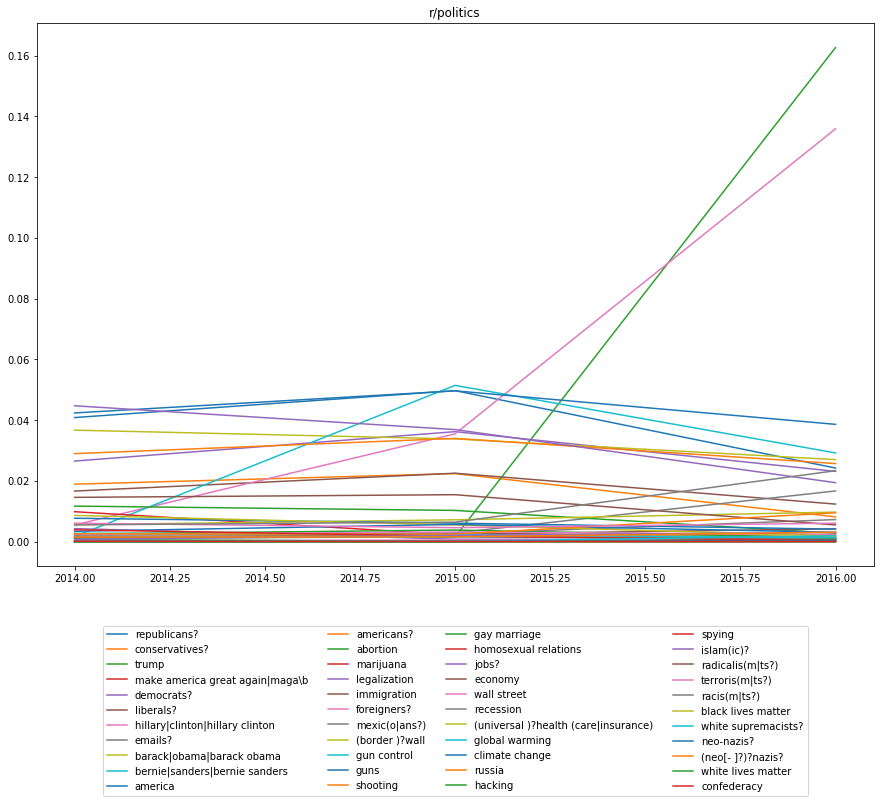

In [71]:
plot_graph(0)

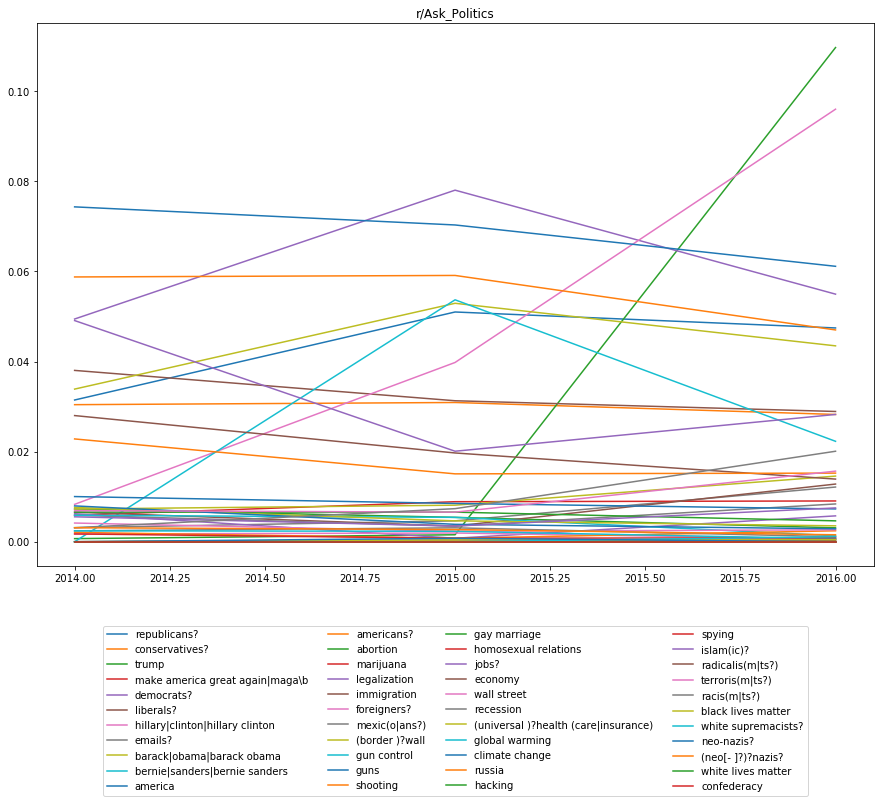

In [48]:
plot_graph(1)

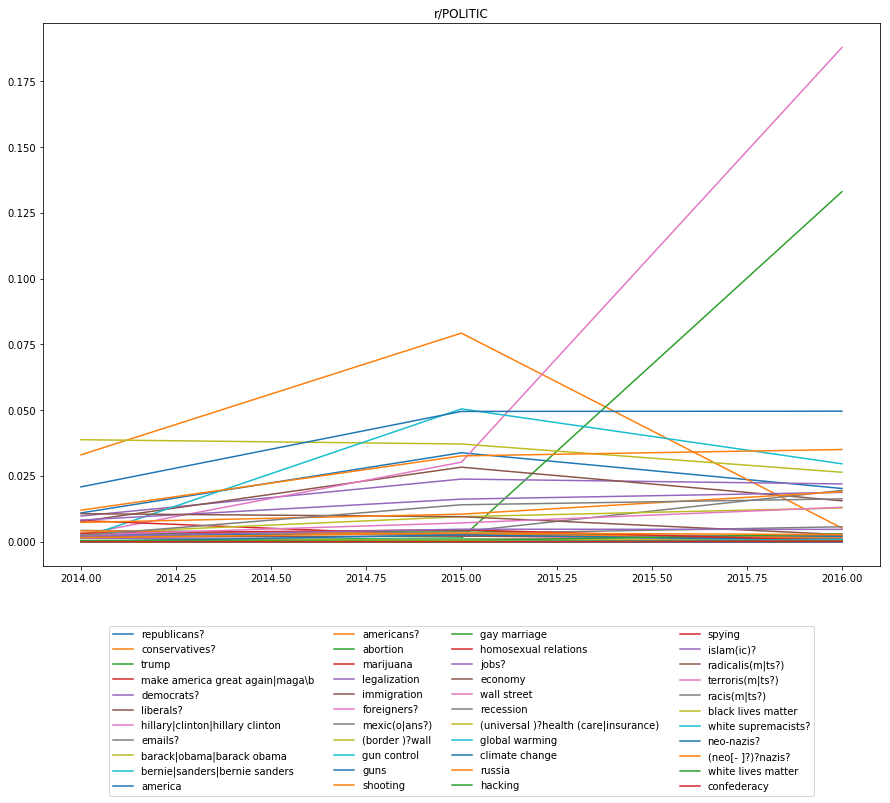

In [49]:
plot_graph(2)

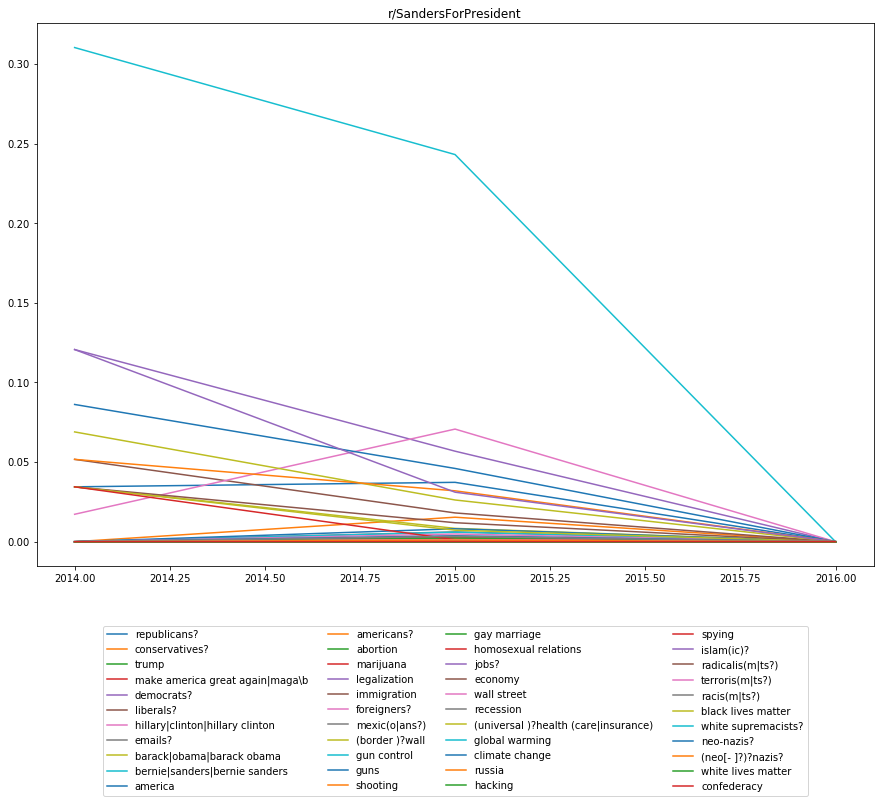

In [51]:
plot_graph(3)

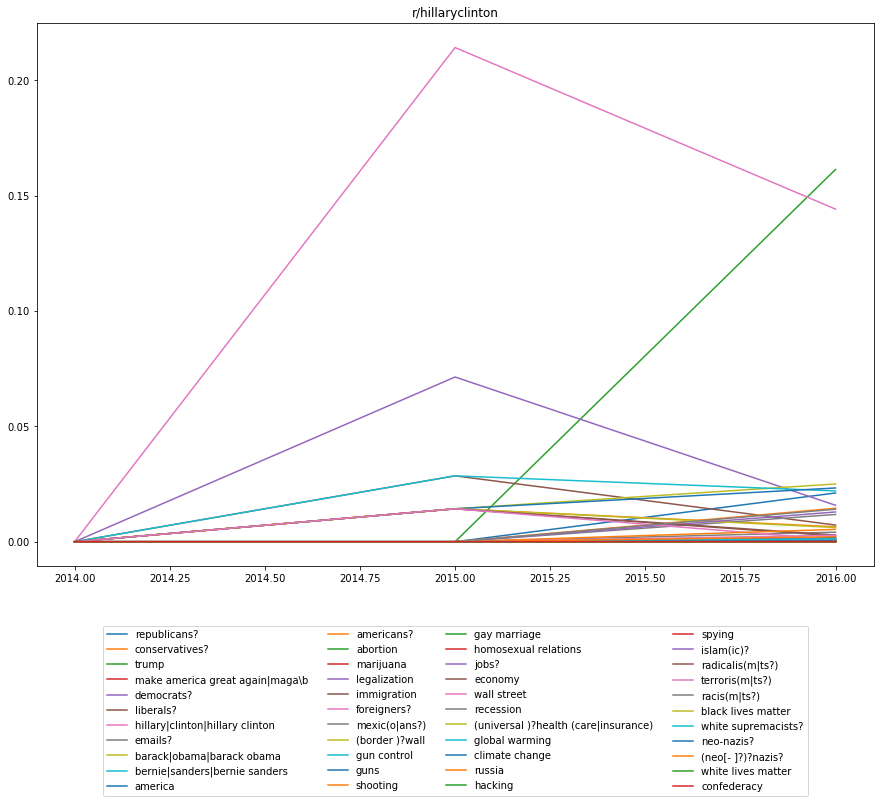

In [52]:
plot_graph(4)

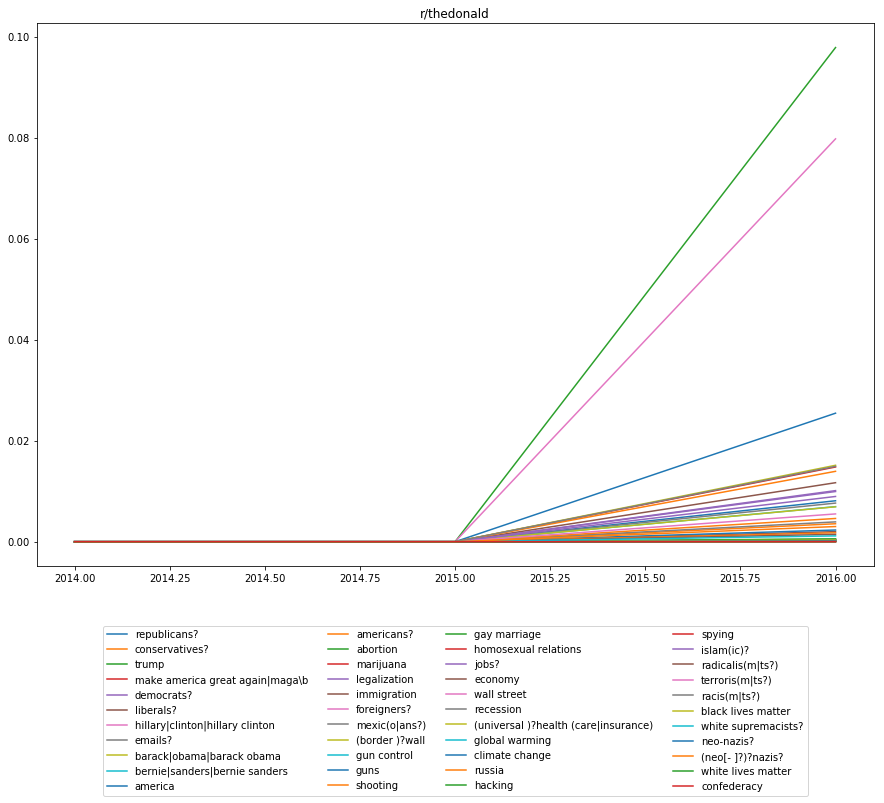

In [54]:
plot_graph(5)

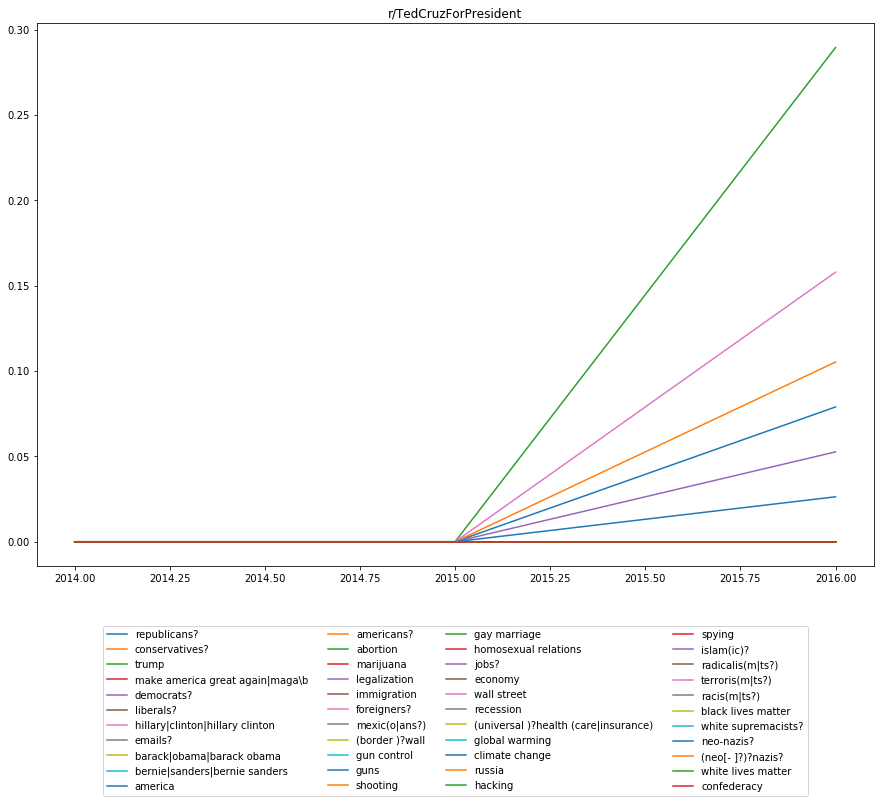

In [55]:
plot_graph(6)

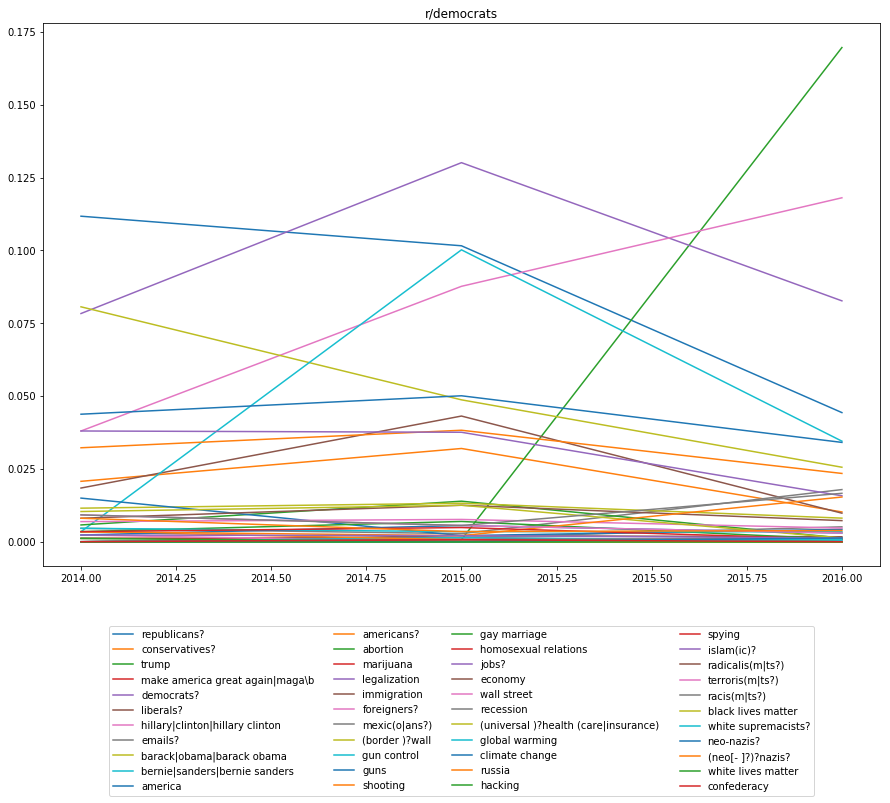

In [57]:
plot_graph(7)

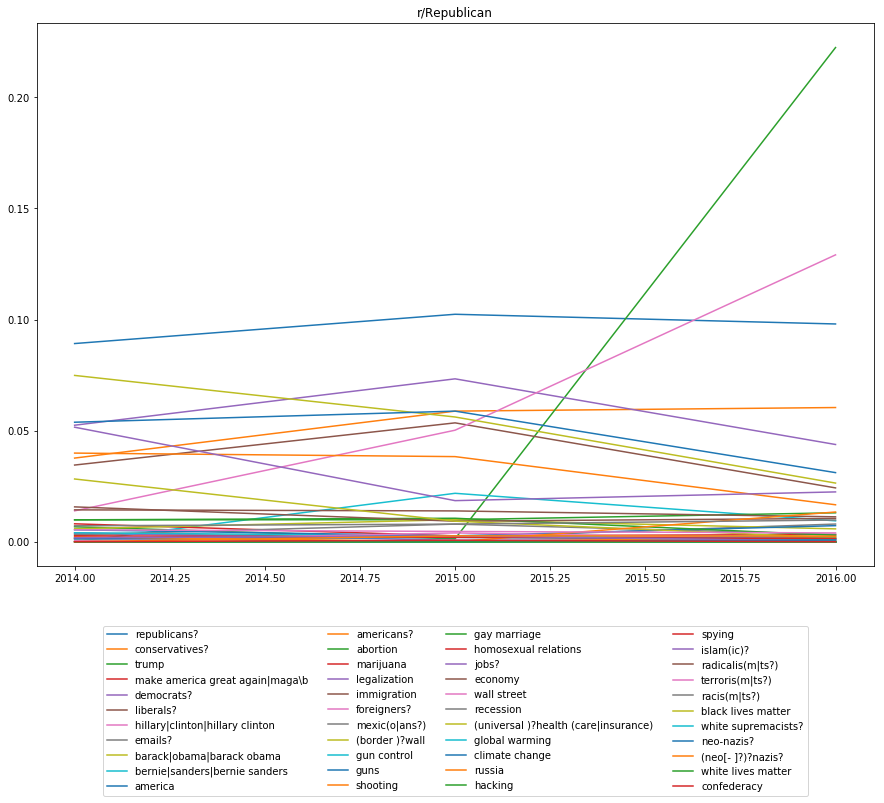

In [58]:
plot_graph(8)

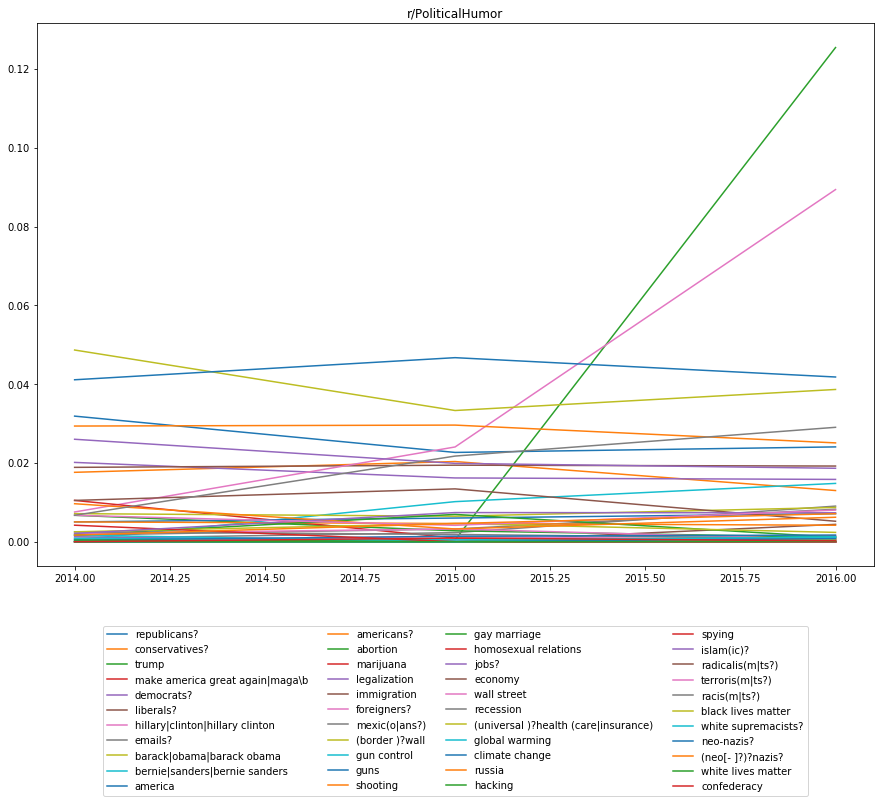

In [60]:
plot_graph(9)

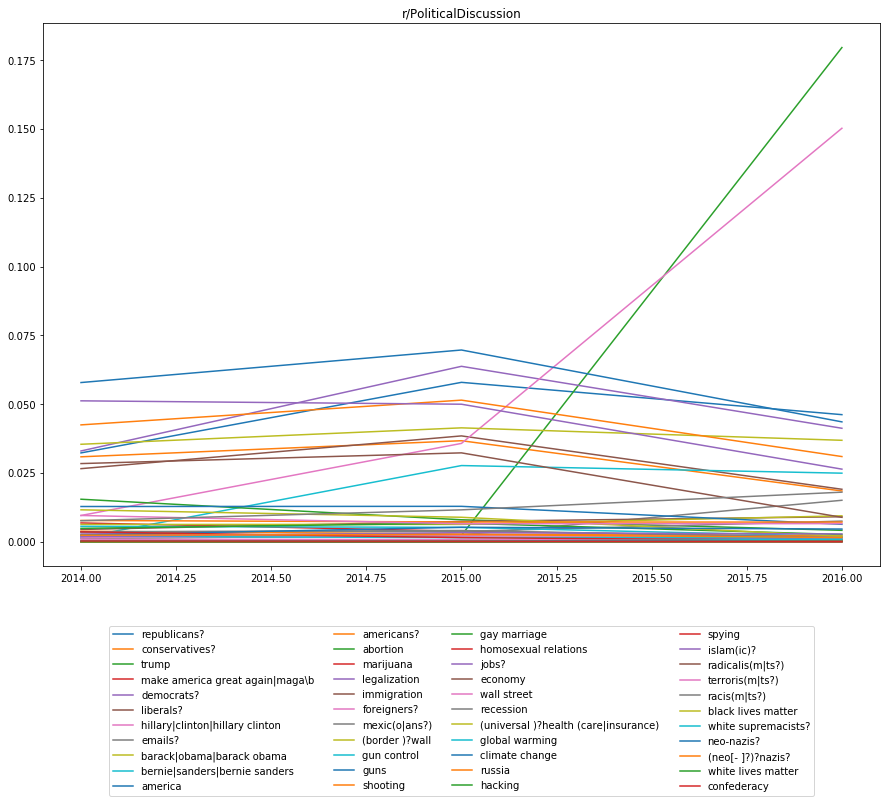

In [61]:
plot_graph(10)

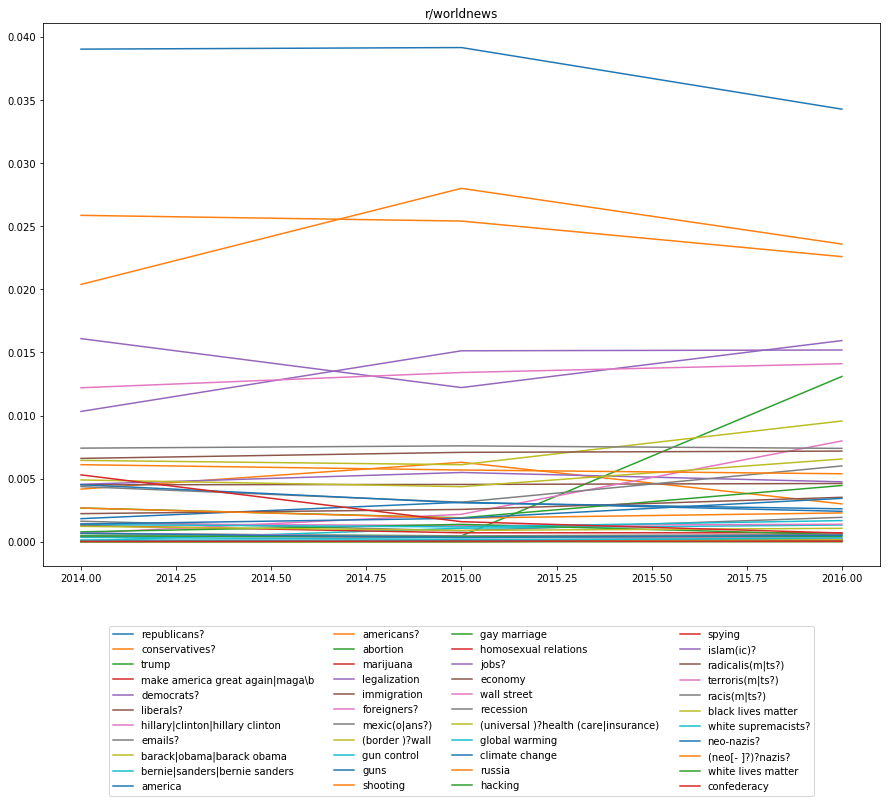

In [62]:
plot_graph(11)

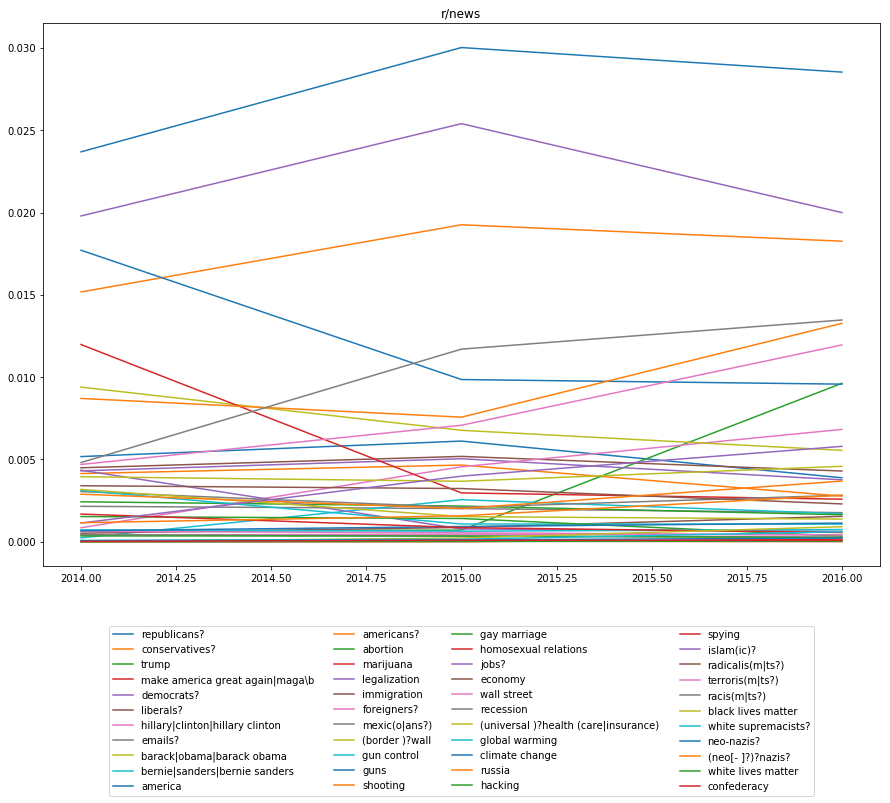

In [63]:
plot_graph(12)

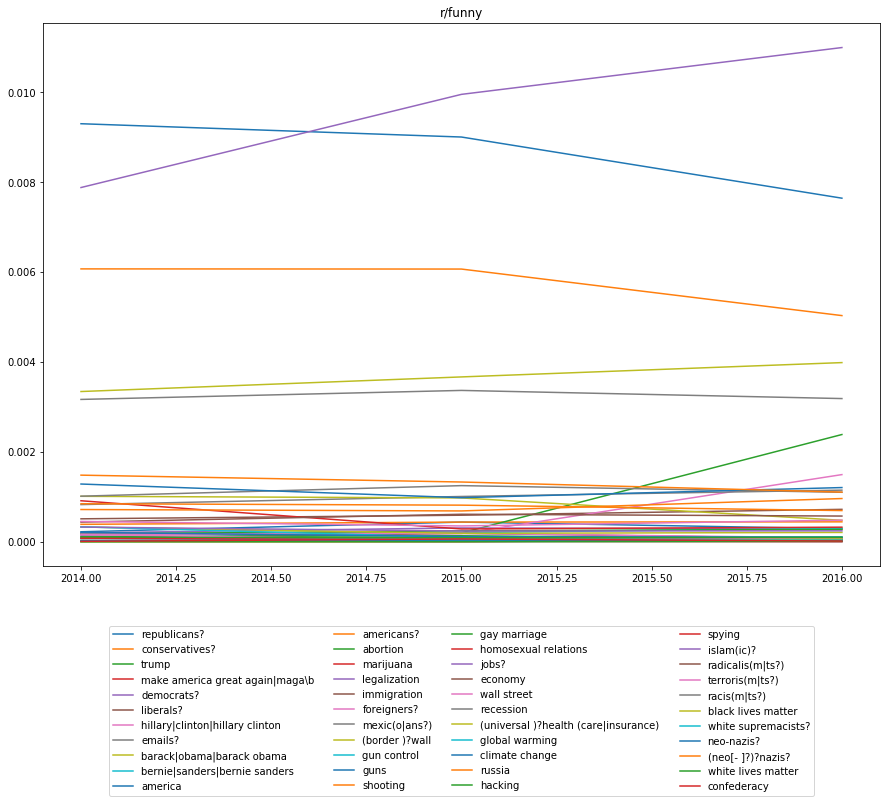

In [64]:
plot_graph(13)

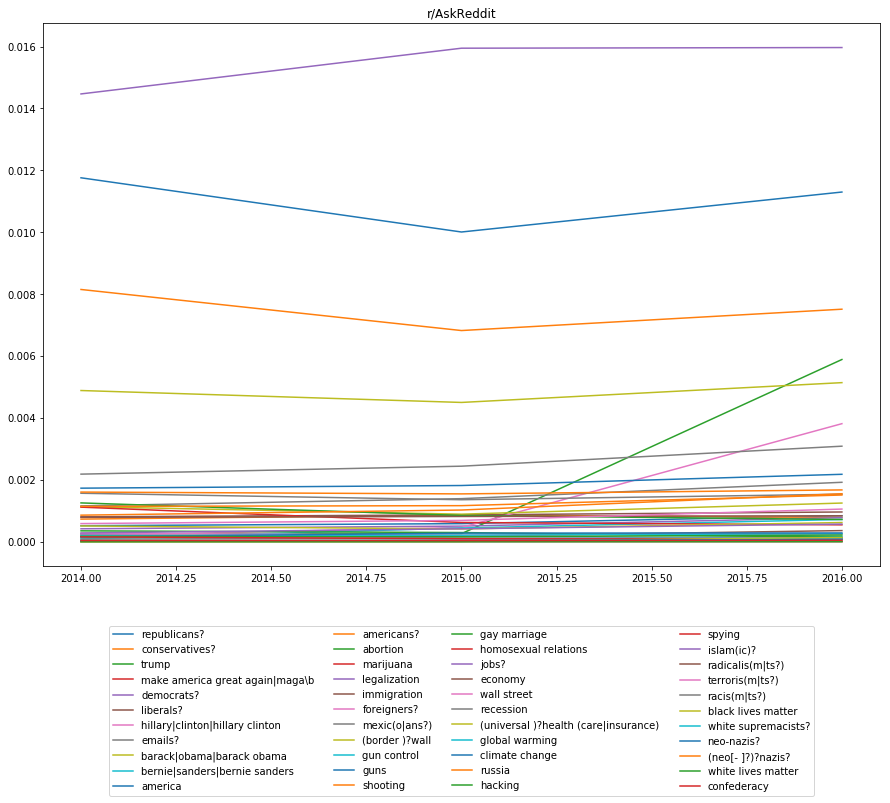

In [73]:
plot_graph(14)

Each chart is measured with frequency of the term appearing in a subreddit comment (normalized by the number of comments per subreddit).

As can be seen in each of the graphs above, each topic phrase changed in frequency (often increasing) as the years progressed. Note that for many instances of 0.0 frequency, the subreddit was not yet existant. Remember that this is only information about a given subset of key political terms across a subset of key political subreddits, and that given more months of data a far greater set of of more accurate trends can be found.